In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_excel("employee_sheet.xlsx")

In [3]:
dataFrame

,Employee Name,Department,Title,Salary
0,Semaj Bowers,Marketing,Mid,600
1,Gary Foster,Sales,Mid,650
2,Saniya Maldonado,HR,Mid,600
3,Jillian Zuniga,HR,C-level,1000
4,Courtney Mora,Sales,Mid,550
...,...,...,...,...
95,Jake Gay,Sales,Junior,443
96,Macy Webster,Finance,C-level,1250
97,Jaquan Meyers,Marketing,Mid-Senior,800
98,Willow Bush,Software Development,Junior,441


In [4]:
#1) How many rows of data are there in total?

In [5]:
len(dataFrame)
#dataFrame.count(axis = 0)

100

In [6]:
#2) What is the average salary of this company?

In [7]:
dataFrame["Salary"].mean()

725.84

In [8]:
#3) What is the average salary comparison by department in this company?

In [48]:
avg_salary_by_department = dataFrame.groupby("Department").mean("Salary")
avg_salary_by_department

,Salary
Department,
Finance,805.411765
HR,640.937500
Marketing,707.000000
Sales,656.666667
Software Development,826.409091


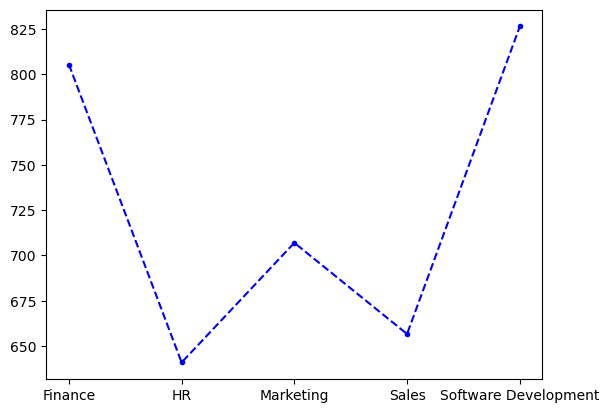

In [49]:
avg_salary_department_plot = plt.plot(avg_salary_by_department,"b.--")

In [10]:
#4) What is the average salary comparison according to title (senior - junior) in this company?

In [44]:
avg_salary_by_title = dataFrame.groupby("Title").mean("Salary")
avg_salary_by_title



,Salary
Title,
C-level,1058.333333
Junior,440.625000
Mid,641.450000
Mid-Senior,725.500000
Senior,867.777778


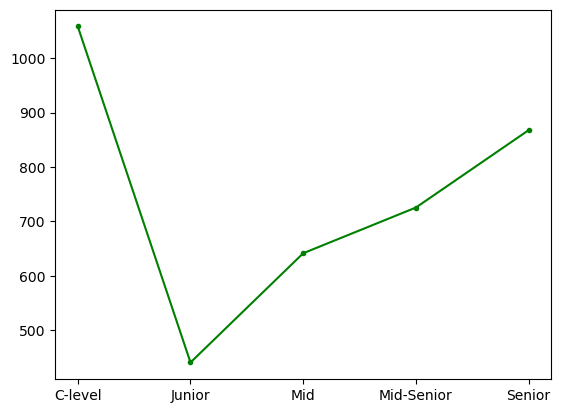

In [45]:
avg_salary_title_plot = plt.plot(avg_salary_by_title,"g.-")

In [13]:
#5) What percentage more average salary does a senior person have than a junior person?

In [14]:
((dataFrame[dataFrame["Title"]=="Senior"]["Salary"].mean()) / (dataFrame[dataFrame["Title"]=="Junior"]["Salary"].mean())-1)*100

96.94247438928292

<BarContainer object of 2 artists>

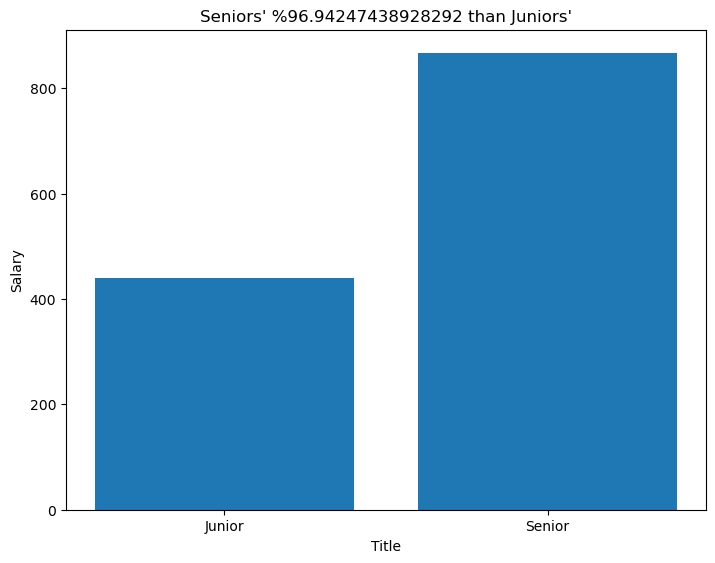

In [8]:
titles = ["Junior","Senior"]
avg_salaries = np.array([dataFrame[dataFrame["Title"]=="Junior"]["Salary"].mean(),dataFrame[dataFrame["Title"]=="Senior"]["Salary"].mean()])
dataFrame[dataFrame["Title"]=="Senior"]["Salary"].mean()
fig_senior_junior = plt.figure()
senior_junior_axes = fig_senior_junior.add_axes([0,0,1,1])
senior_junior_axes.set_xlabel("Title") 
senior_junior_axes.set_ylabel("Salary")
result_number = ((dataFrame[dataFrame["Title"]=="Senior"]["Salary"].mean()) / (dataFrame[dataFrame["Title"]=="Junior"]["Salary"].mean())-1)*100
graph_title = f"Seniors' %{result_number} than Juniors'"
senior_junior_axes.set_title(graph_title) 
senior_junior_axes.bar(titles,avg_salaries)

In [16]:
#6) How much higher is the average salary of a senior person in the software development department compared to a junior person?

In [17]:
dataFrame[(dataFrame["Title"] == "Senior") & (dataFrame["Department"] == "Software Development")]["Salary"].mean() - dataFrame[(dataFrame["Title"] == "Junior") & (dataFrame["Department"] == "Software Development")]["Salary"].mean()

464.6666666666667

In [18]:
#7) How much higher is the average salary of a C-level person in the finance department than a mid-senior person?

In [19]:
dataFrame[(dataFrame["Title"] == "C-level") & (dataFrame["Department"] == "Finance")]["Salary"].mean() - dataFrame[(dataFrame["Title"] == "Mid-Senior") & (dataFrame["Department"] == "Finance")]["Salary"].mean()

240.0

In [20]:
#8) How many times more c-level employees work in the software development department than in the marketing department?

In [21]:
int(len(dataFrame[(dataFrame["Title"] == "C-level") & (dataFrame["Department"] == "Software Development")]) / len(dataFrame[(dataFrame["Title"] == "C-level") & (dataFrame["Department"] == "Marketing")]))

3

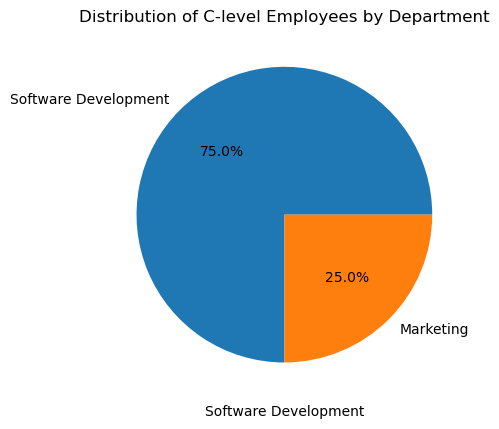

In [8]:
clevel_in_software = len(dataFrame[(dataFrame["Title"] == "C-level") & (dataFrame["Department"] == "Software Development")])
clevel_in_marketing = len(dataFrame[(dataFrame["Title"] == "C-level") & (dataFrame["Department"] == "Marketing")])
clevels_salary = [clevel_in_software,clevel_in_marketing]
clevels_departments = ["Software Development","Marketing"]
plt.title("Distribution of C-level Employees by Department")
plt.xlabel("Software Development")
plt.ylabel = "Marketing"
plt.pie(clevels_salary,labels = clevels_departments,autopct = "%1.1f%%")
plt.show()